In [1]:
# Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice 
# sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order 
# either on a mobile app or website for the clothes they want.

# The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 

## Importing required libraries



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
ecom = pd.read_csv('ecom.csv')

In [4]:
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
ecom.shape

(500, 8)

In [7]:
ecom.describe

<bound method NDFrame.describe of                              Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0       835 Frank Tunnel\r\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\r\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\r\nCobbborough,...            Bisque   
3    1414 David Throughway\r\nPort Jason, OH 22070-...       SaddleBrown   
4    14023 Rodriguez Passage\r\nPort Jacobville, PR...  MediumAquaMarine   
..                                                 ..

In [8]:
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# <font color = 'red'> EXPLORATORY DATA ANALYSIS </font>

In [10]:
sns.set(style = 'darkgrid')

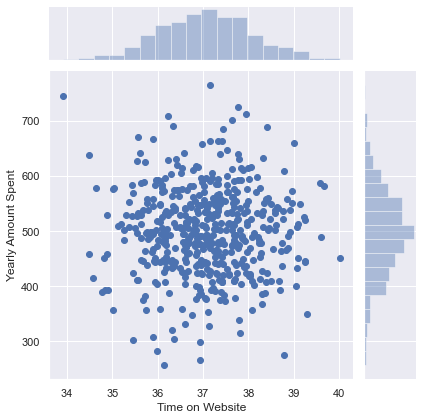

In [12]:
sns.jointplot(x = ecom['Time on Website'],y = ecom['Yearly Amount Spent'])

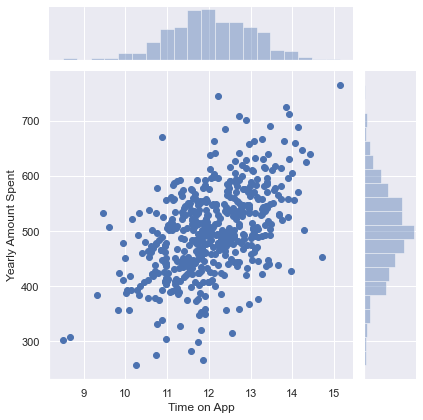

In [13]:
sns.jointplot(x = ecom['Time on App'],y = ecom['Yearly Amount Spent'])

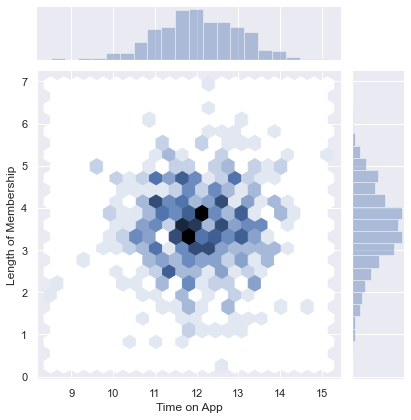

In [14]:
sns.jointplot(x = 'Time on App',y = 'Length of Membership',data = ecom,kind = 'hex')

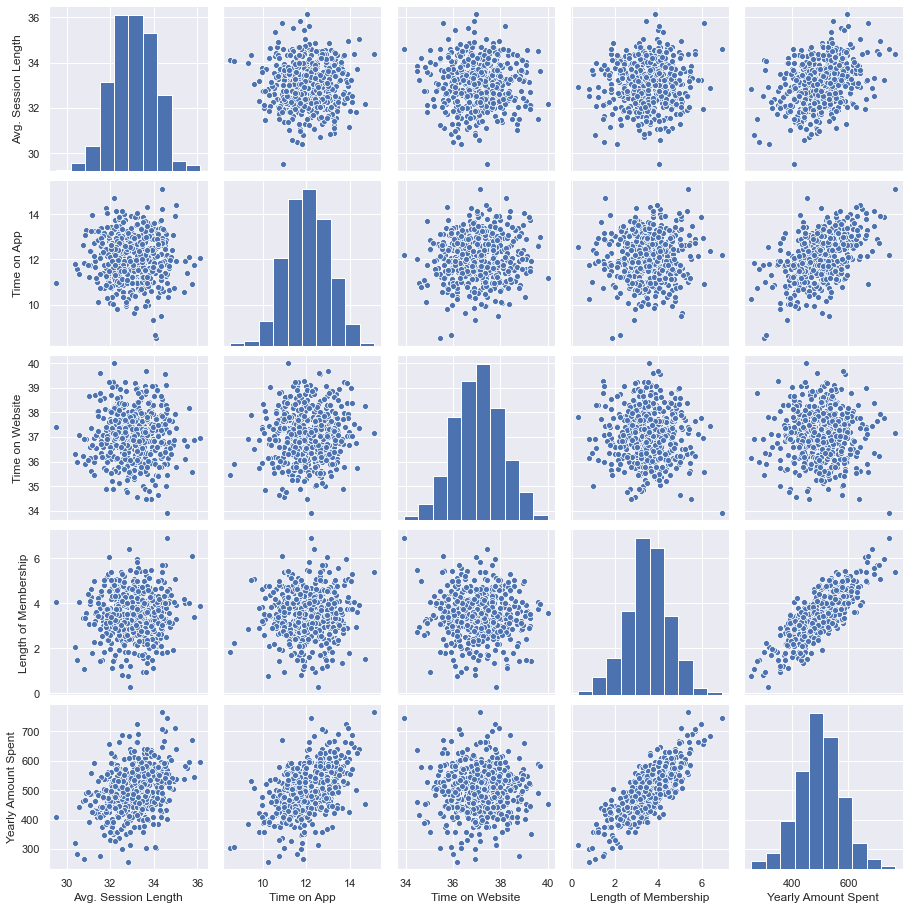

In [65]:
sns.pairplot(ecom)

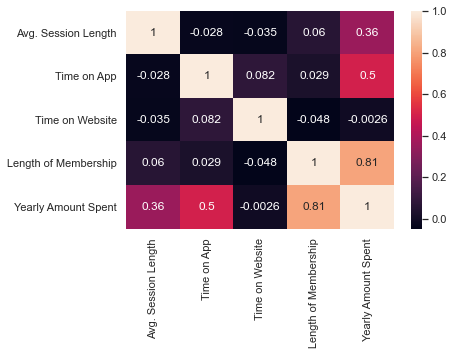

In [67]:
sns.heatmap(ecom.corr(),annot = True)

In [17]:
ecom.corr()

## From heatmap and these correlation we can observe that Yearly amount Spent and Length Of Memebership are  
## highest correlated i.e. (0.809084)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [18]:
from sklearn.linear_model import LinearRegression

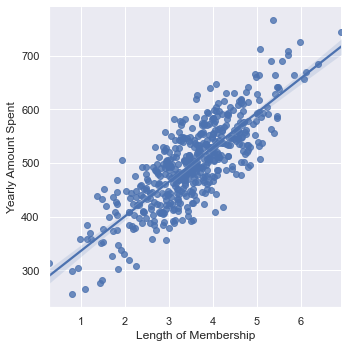

In [68]:
sns.lmplot(x = 'Length of Membership',y = 'Yearly Amount Spent',data = ecom)

# <font color = 'purple'> TRAINING AND TESTING DATA </font>

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [25]:
ecom.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [35]:
X = ecom[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

y = ecom['Yearly Amount Spent']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# <font color = 'yellow'> MODEL TRAINING </font>

In [71]:
from sklearn.linear_model import LinearRegression

## Importing Linear Regression from sklearn

In [39]:
lm = LinearRegression()

In [41]:
lm.fit(X_train,y_train)

## fit lm on training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lm.intercept_

-1047.9327819531536

In [43]:
lm.coef_

array([25.98154972, 38.59015876,  0.19040527, 61.27909654])

# <font color = 'green'> PREDICTIONS </font>

In [45]:
predictions = lm.predict(X_test)

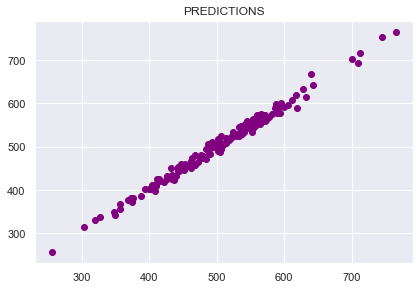

In [53]:
plt.scatter(y_test,predictions,color = 'purple')
plt.tight_layout()
plt.title("PREDICTIONS")
plt.show()

In [62]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 7.228148667775293
MSE: 79.8130518128461
RMSE: 8.933815076038126


# <font color = 'blue'> RESIDUALS </font>

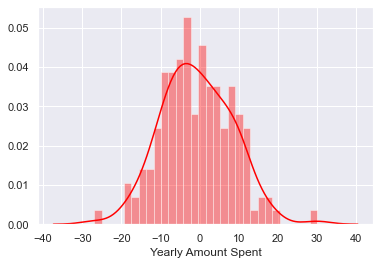

In [64]:
sns.distplot(y_test-predictions,bins = 30,color = 'red')

# CONCLUSIONS

In [63]:
pd.DataFrame(lm.coef_,X.columns,columns = ['Coefficients'])

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
